HR Sample Data Analysis from Kaggle kernel
Company Name: Dental Magic, Inc

In [1]:
import seaborn as sns
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt  
matplotlib.style.use('ggplot')
%matplotlib inline
import math
import matplotlib as mpl
import plotly
import colorsys
plt.style.use('seaborn-talk')
from mpl_toolkits.mplot3d import Axes3D
from __future__ import division
import pylab
import plotly.plotly as py
import plotly.graph_objs as go
from matplotlib import colors as mcolors
from scipy import stats
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()

In [2]:
df =  pd.read_csv('HR_Datasets/human-resources-data-set/core_dataset.csv')
df.describe()

,Employee Number,Zip,Age,Pay Rate
count,3.010000e+02,301.000000,301.000000,301.000000
mean,1.205421e+09,6705.196013,38.548173,30.715249
std,1.826616e+08,17167.527864,8.942884,15.216214
min,6.020003e+08,1013.000000,25.000000,14.000000
25%,1.102024e+09,1901.000000,31.000000,20.000000
50%,1.204033e+09,2132.000000,37.000000,24.000000
75%,1.401065e+09,2421.000000,44.000000,43.000000
max,1.988300e+09,98052.000000,67.000000,80.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 21 columns):
Employee Name          301 non-null object
Employee Number        301 non-null float64
State                  301 non-null object
Zip                    301 non-null float64
DOB                    301 non-null object
Age                    301 non-null float64
Sex                    301 non-null object
MaritalDesc            301 non-null object
CitizenDesc            301 non-null object
Hispanic/Latino        301 non-null object
RaceDesc               301 non-null object
Date of Hire           301 non-null object
Date of Termination    103 non-null object
Reason For Term        301 non-null object
Employment Status      301 non-null object
Department             301 non-null object
Position               301 non-null object
Pay Rate               301 non-null float64
Manager Name           301 non-null object
Employee Source        301 non-null object
Performance Score      301 non-

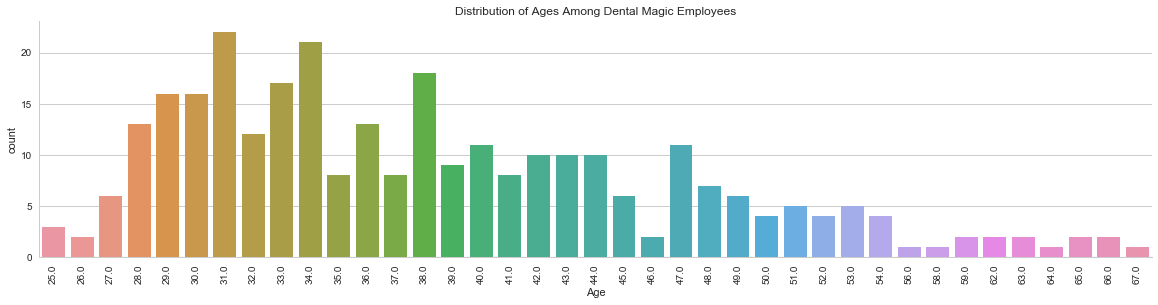

In [4]:
g = sns.factorplot("Age", data=df, aspect=4, kind="count")
g.set_xticklabels(rotation=90)
g = plt.title("Distribution of Ages Among Dental Magic Employees")

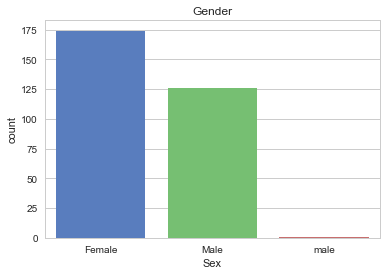

In [5]:
sns.countplot(df["Sex"])
g = plt.title("Gender")

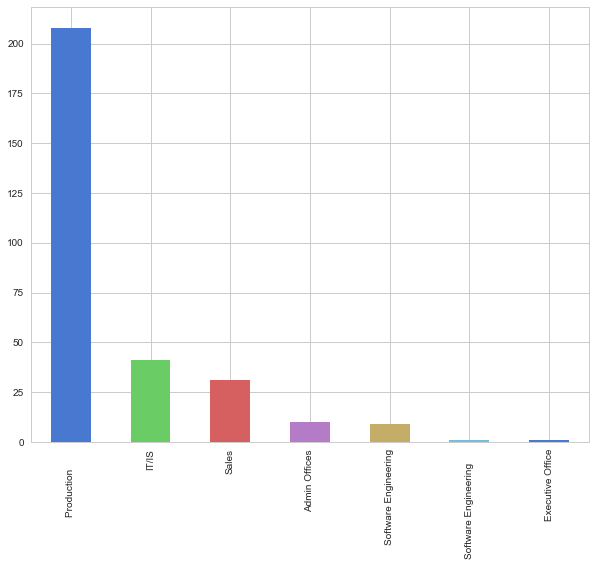

In [6]:
df['Department'].value_counts()[0:20].plot(kind='bar',figsize=(10,8))

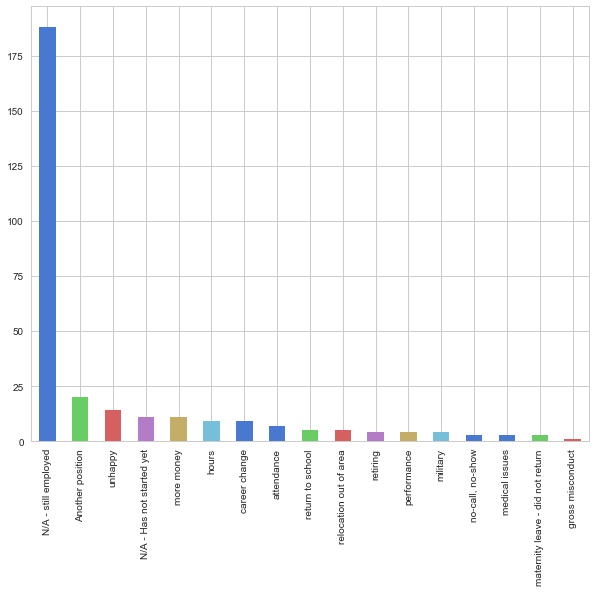

In [7]:
df['Reason For Term'].value_counts()[0:20].plot(kind='bar',figsize=(10,8))

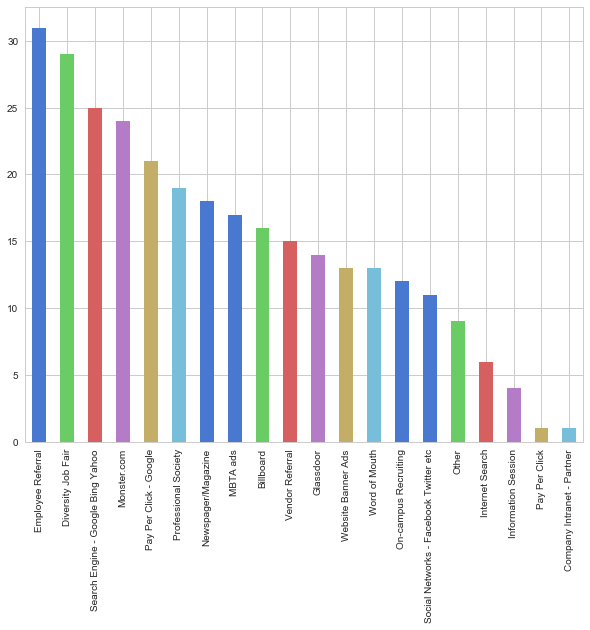

In [8]:
df['Employee Source'].value_counts()[0:20].plot(kind='bar',figsize=(10,8))

In [9]:
pd.pivot_table(df,index=["Department"])

,Age,Employee Number,Pay Rate,Zip
Department,,,,
Admin Offices,32.100000,1.155638e+09,31.896000,1998.000000
Executive Office,63.000000,1.001495e+09,80.000000,1902.000000
IT/IS,37.804878,1.161531e+09,44.792195,4447.341463
Production,39.024038,1.209209e+09,23.086298,2082.543269
Sales,38.645161,1.277150e+09,55.524194,43865.129032
Software Engineering,33.666667,1.171368e+09,51.072222,2096.555556
Software Engineering,51.000000,1.001645e+09,27.000000,2184.000000


In [10]:
pd.pivot_table(df,index=["Employment Status"])

,Age,Employee Number,Pay Rate,Zip
Employment Status,,,,
Active,37.793103,1.216890e+09,32.982586,8928.356322
Future Start,36.000000,1.179950e+09,32.509091,8994.636364
Leave of Absence,40.857143,1.192652e+09,27.767857,2344.285714
Terminated for Cause,37.071429,1.176708e+09,33.021429,5265.071429
Voluntarily Terminated,40.227273,1.192527e+09,26.109886,2946.113636


In [11]:
pd.pivot_table(df,index=["Reason For Term"])

,Age,Employee Number,Pay Rate,Zip
Reason For Term,,,,
Another position,41.550000,1.261010e+09,26.675000,3088.800000
N/A - Has not started yet,36.000000,1.179950e+09,32.509091,8994.636364
N/A - still employed,38.021277,1.215085e+09,32.594255,8438.053191
attendance,38.285714,1.217888e+09,32.000000,7678.285714
career change,38.666667,1.141373e+09,31.277778,2117.666667
gross misconduct,31.000000,1.011023e+09,21.000000,2747.000000
hours,41.000000,1.162833e+09,29.577778,2519.111111
maternity leave - did not return,29.333333,1.108028e+09,34.083333,7822.000000
medical issues,31.333333,1.105026e+09,31.806667,2015.666667


In [12]:
employment_status = df.groupby(by='Employment Status').size().sort_values(ascending=False).head(10)
print (employment_status)

Employment Status
Active                    174
Voluntarily Terminated     88
Terminated for Cause       14
Leave of Absence           14
Future Start               11
dtype: int64


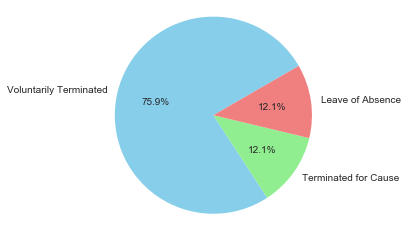

In [13]:
labels = 'Voluntarily Terminated', 'Terminated for Cause', 'Leave of Absence'
sizes = [88, 14, 14]
colors = ['skyblue', 'lightgreen', 'lightcoral']

plt.pie(sizes,               
        labels=labels,      
        colors=colors,      
        autopct='%1.1f%%',  
        startangle=30       
        )

plt.axis('equal')

plt.show()

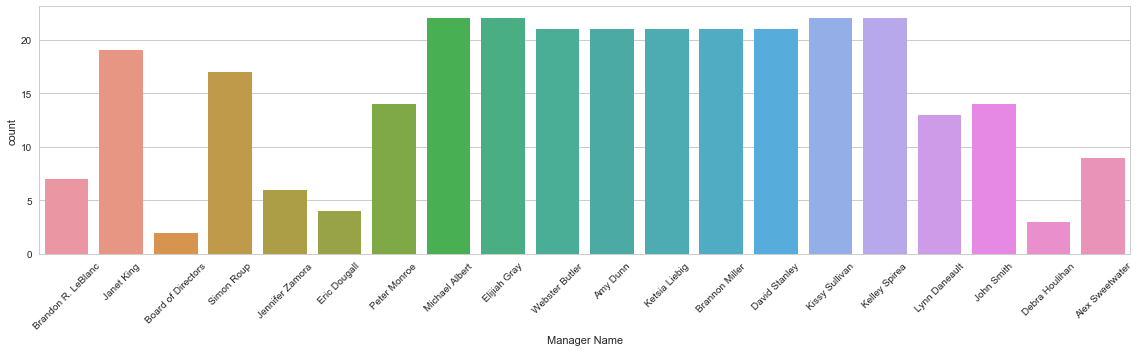

In [14]:
plt.figure(figsize=(16,5))
sns.countplot('Manager Name', data = df)
plt.xticks(rotation = 45)
plt.tight_layout()

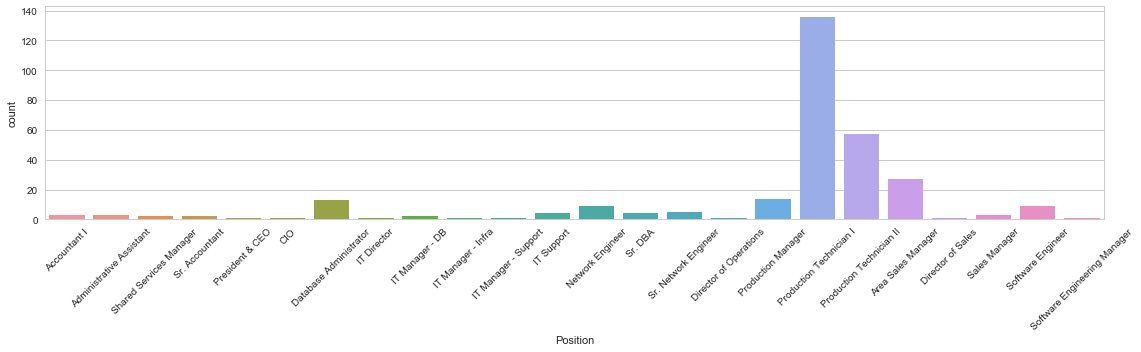

In [15]:
plt.figure(figsize=(16,5))
sns.countplot('Position', data = df)
plt.xticks(rotation = 45)
plt.tight_layout()

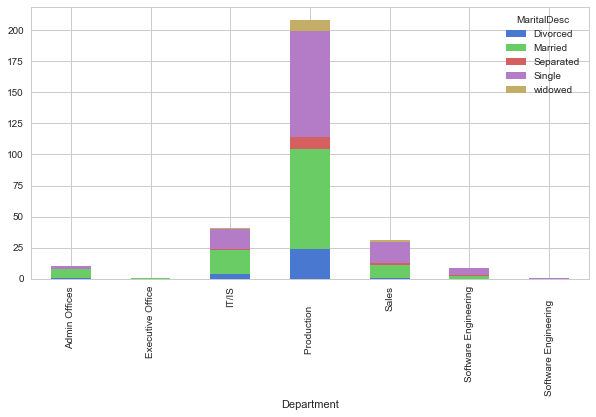

In [16]:
clarity_color_table = pd.crosstab(index=df["Department"], 
                          columns=df["MaritalDesc"])

clarity_color_table.plot(kind="bar", 
                 figsize=(10,5),
                 stacked=True)

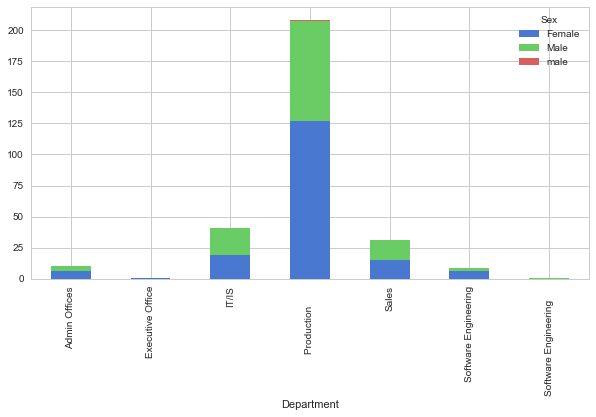

In [17]:
clarity_color_table = pd.crosstab(index=df["Department"], 
                          columns=df["Sex"])

clarity_color_table.plot(kind="bar", 
                 figsize=(10,5),
                 stacked=True)

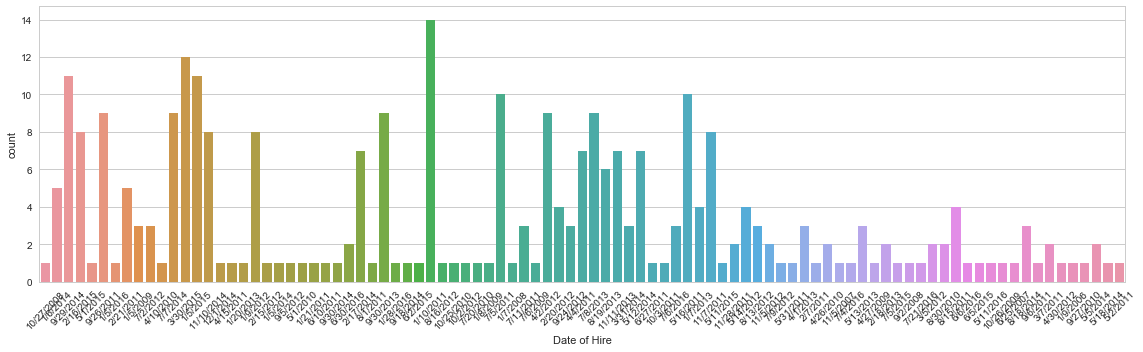

In [18]:
plt.figure(figsize=(16,5))
sns.countplot('Date of Hire', data = df)
plt.xticks(rotation = 45)
plt.tight_layout()